<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/euler-and-solve-ivp-leo-g-flores/blob/main/Euler_and_solve_ivp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import math
import scipy.integrate
import matplotlib.pyplot as plt
import numpy as np

###Pseudocode
1. We will apply a euler code to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.
2. I will plot the temporal evolution of $\theta$ for theta_0 = math.pi and ang_vel_0 = 0
3. Plot the temporal evolution and the phase portrait of $\theta$ for theta_0 = 0 and ang_vel_0 = 2
4. Compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density.

In [42]:
omega_0 = math.pi
# We will define the angular acceleration function for the rigid pendulum
def angular_acceleration(theta_val, omega_0_val):
    return -omega_0_val**2 * math.sin(theta_val)

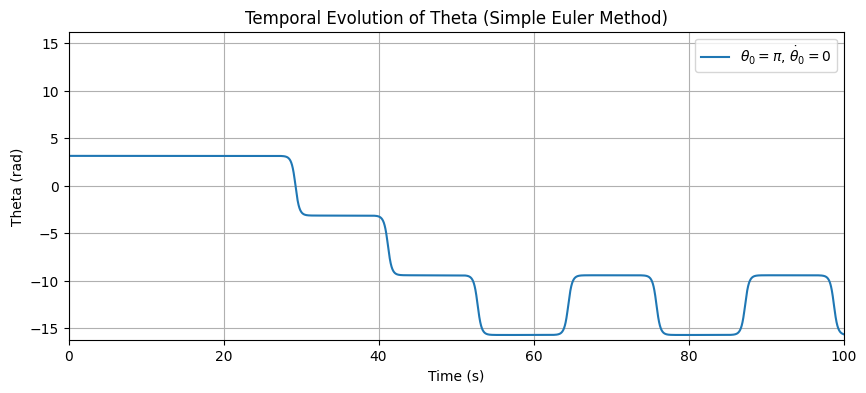

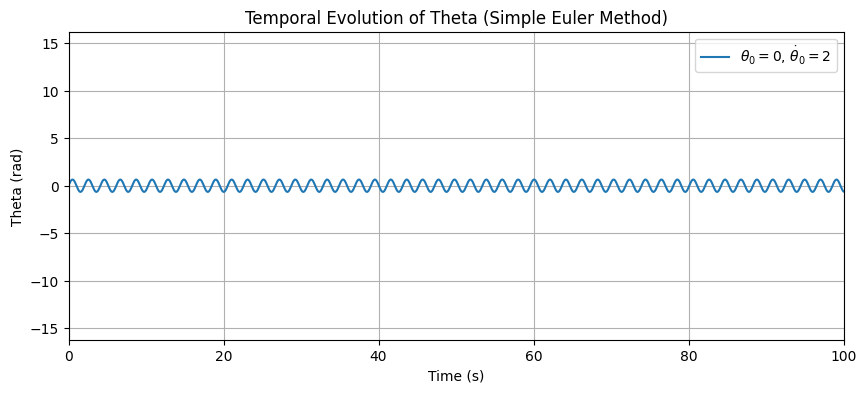

In [43]:
# Simple Euler Method Implementation
def euler_method(initial_theta, initial_angular_velocity, omega_0, dt, t_max):
    time_points = np.arange(0, t_max, dt)
    theta_values = []
    angular_velocity_values = []

    theta = initial_theta
    angular_velocity = initial_angular_velocity

    for t in time_points:
        theta_values.append(theta)
        angular_velocity_values.append(angular_velocity)

        # Calculate acceleration based on current theta
        accel = angular_acceleration(theta, omega_0)

        # Euler update rule
        angular_velocity = angular_velocity + accel * dt
        theta = theta + angular_velocity * dt

    return time_points, np.array(theta_values), np.array(angular_velocity_values)

# Initial conditions and parameters for the first plot
theta_0_1 = math.pi
ang_vel_0_1 = 0
dt = 0.01
t_max = 100

time_1, theta_1, ang_vel_1 = euler_method(theta_0_1, ang_vel_0_1, omega_0, dt, t_max)

# Plot the temporal evolution of theta for the first case
plt.figure(figsize=(10, 4))
plt.plot(time_1, theta_1, label=r'$\theta_0 = \pi$, $\dot{\theta}_0 = 0$')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Temporal Evolution of Theta (Simple Euler Method)')
plt.xlim([0, t_max])
plt.ylim([-5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.grid(True)
plt.legend()
plt.show()

# Initial conditions and parameters for the second plot
theta_0_2 = 0
ang_vel_0_2 = 2

time_2, theta_2, ang_vel_2 = euler_method(theta_0_2, ang_vel_0_2, omega_0, dt, t_max)

# Plot the temporal evolution of theta for the second case
plt.figure(figsize=(10, 4))
plt.plot(time_2, theta_2, label=r'$\theta_0 = 0$, $\dot{\theta}_0 = 2$')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.title('Temporal Evolution of Theta (Simple Euler Method)')
plt.xlim([0, t_max])
plt.ylim([-5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.grid(True)
plt.legend()
plt.show()

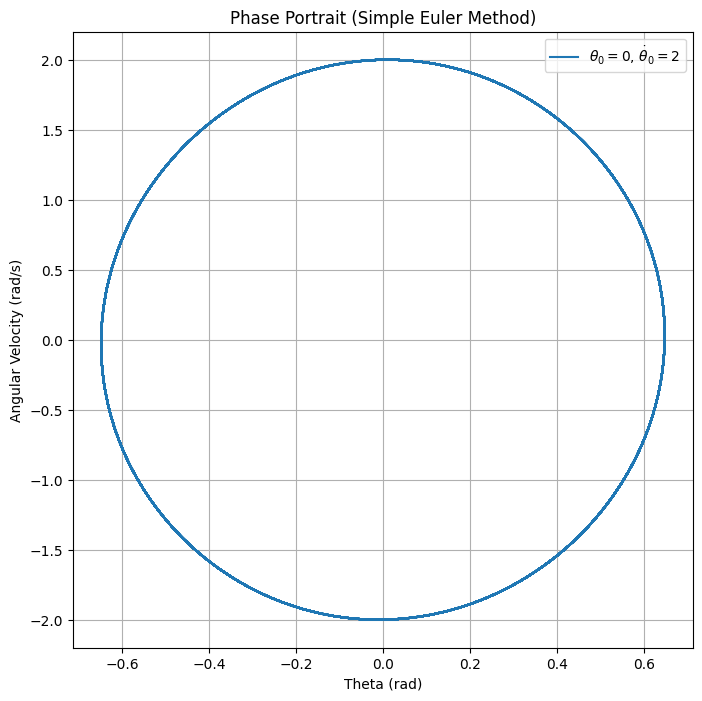

In [44]:
# Plot the phase portrait for the second case
plt.figure(figsize=(8, 8))
plt.plot(theta_2, ang_vel_2, label=r'$\theta_0 = 0$, $\dot{\theta}_0 = 2$')
plt.xlabel('Theta (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Phase Portrait (Simple Euler Method)')
plt.grid(True)
plt.legend()
plt.show()

###The methods differ by comparing the change in theta against time for the simple euler case, while the symplectic/ semi-implicit euler method shows the chance in ang_vel against change in theta.

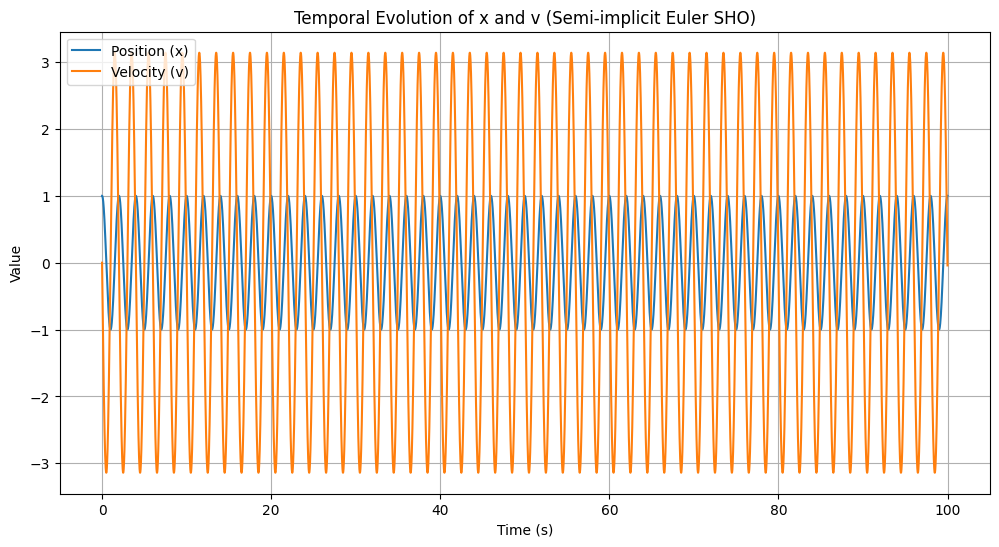

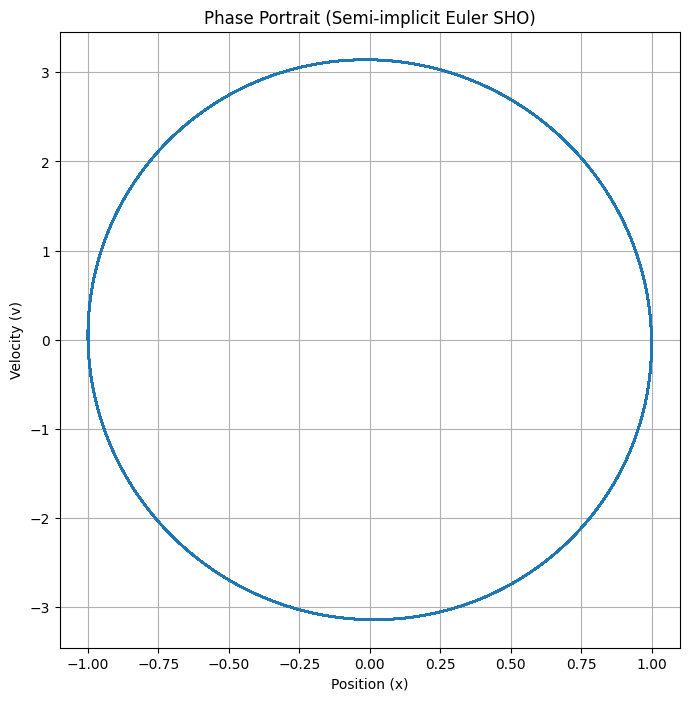

In [48]:
# define our test euler method for a simple harmonic oscillator
def euler_sho(omega_0, x_0, v_0, t_0, t_f, n_steps): # defines function
  """
  This function calculates the solution to x'' = - omega_0 ^2 x with Euler's method. # clarity
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  x = [x_0] # initialized x list
  v = [v_0] # initialized v list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    x_new = x[-1] + v[-1] * dt # update x
    v_new = v[-1] - omega_0 ** 2 * x_new * dt # update v : using an implicit form
    t_new = t[-1] + dt # update t
    x.append(x_new) # append x
    v.append(v_new) # append v
    t.append(t_new) # append t
  return t, x, v

# Parameters for the simple harmonic oscillator
omega_0_sho = math.pi # setting parameters
x_0_sho = 1.0 # setting parameters
v_0_sho = 0.0 # setting parameters
t_0_sho = 0.0 # setting parameters
t_f_sho = 100.0 # setting parameters
n_steps_sho = 10000 # setting parameters

# Generate data using euler_sho
t_sho, x_sho, v_sho = euler_sho(omega_0_sho, x_0_sho, v_0_sho, t_0_sho, t_f_sho, n_steps_sho)

# Plot the temporal evolution of x and v
plt.figure(figsize=(12, 6))
plt.plot(t_sho, x_sho, label='Position (x)')
plt.plot(t_sho, v_sho, label='Velocity (v)')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Temporal Evolution of x and v (Semi-implicit Euler SHO)')
plt.grid(True)
plt.legend()
plt.show()

# Plot the phase portrait (v vs x)
plt.figure(figsize=(8, 8))
plt.plot(x_sho, v_sho)
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.title('Phase Portrait (Semi-implicit Euler SHO)')
plt.grid(True)
plt.show()